In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [20]:
data = pd.read_csv('https://github.com/Sahil-Naik/BE-Programming/raw/main/LP-V(DL)/Assignment-4/GOOG.csv')

In [21]:
data_copy = data.copy()

data_copy.dropna(inplace=True)

selected_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_copy = data_copy[selected_features]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_copy)

In [22]:
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [23]:
df.iloc[3496]

Date          2018-07-10
Open          1156.97998
High         1159.589966
Low          1149.589966
Close        1152.839966
Adj Close    1152.839966
Volume            798400
Name: 3496, dtype: object

In [24]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [25]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("Info:\n", df.info())
print("Summary statistics:\n", df.describe())

Dataset shape: (3809, 7)
Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3809 non-null   object 
 1   Open       3809 non-null   float64
 2   High       3809 non-null   float64
 3   Low        3809 non-null   float64
 4   Close      3809 non-null   float64
 5   Adj Close  3809 non-null   float64
 6   Volume     3809 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 208.4+ KB
Info:
 None
Summary statistics:
               Open         High          Low        Close    Adj Close  \
count  3809.000000  3809.000000  3809.000000  3809.000000  3809.000000   
mean    477.021219   481.312940   472.442959   476.979070   476.979070   
std     325.569981   328.160631   323.008258   325.744535   325.744535   
min      49.409801  

In [26]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20 00:00:00+00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23 00:00:00+00:00,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24 00:00:00+00:00,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25 00:00:00+00:00,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [27]:
df.shape


(3809, 7)

In [28]:
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60

X, y = prepare_data(scaled_data, time_steps)

In [29]:
len(y)

3749

In [30]:
split_ratio = 0.8  # Train-test split ratio
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [31]:
df.iloc[3496]

Date         2018-07-10 00:00:00+00:00
Open                        1156.97998
High                       1159.589966
Low                        1149.589966
Close                      1152.839966
Adj Close                  1152.839966
Volume                          798400
Name: 3496, dtype: object

In [32]:
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=100),
    Dropout(0.2),
    Dense(units=len(selected_features))
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Display model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           42800     
                                                                 
 dropout_4 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                

In [33]:
epochs = 20

history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/20
94/94 [==============================] - 26s 203ms/step - loss: 0.0045 - accuracy: 0.3004
Epoch 2/20
94/94 [==============================] - 18s 188ms/step - loss: 0.0019 - accuracy: 0.3501
Epoch 3/20
94/94 [==============================] - 19s 196ms/step - loss: 0.0017 - accuracy: 0.3671
Epoch 4/20
94/94 [==============================] - 14s 148ms/step - loss: 0.0014 - accuracy: 0.3568
Epoch 5/20
94/94 [==============================] - 14s 148ms/step - loss: 0.0014 - accuracy: 0.3695
Epoch 6/20
94/94 [==============================] - 14s 149ms/step - loss: 0.0012 - accuracy: 0.3701
Epoch 7/20
94/94 [==============================] - 14s 149ms/step - loss: 0.0012 - accuracy: 0.3605
Epoch 8/20
94/94 [==============================] - 14s 153ms/step - loss: 0.0012 - accuracy: 0.3741
Epoch 9/20
94/94 [==============================] - 14s 154ms/step - loss: 0.0011 - accuracy: 0.3668
Epoch 10/20
94/94 [==============================] - 15s 156ms/step - loss: 0.0011 - accura

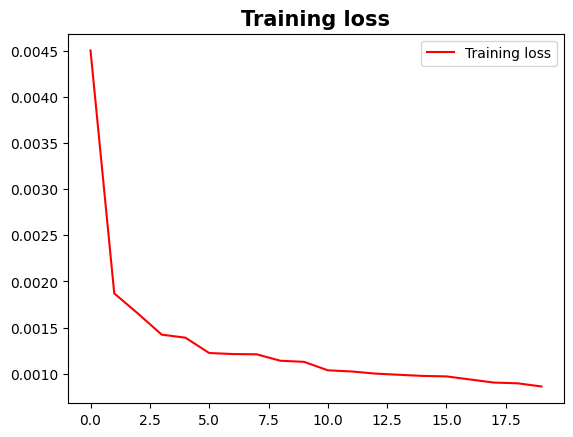

<Figure size 640x480 with 0 Axes>

Train Loss: [0.0006765808211639524, 0.49049684405326843]
Test Loss: [0.0009801260894164443, 0.37466666102409363]


In [34]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

In [35]:
split_index=3496
df.iloc[3496]

Date         2018-07-10 00:00:00+00:00
Open                        1156.97998
High                       1159.589966
Low                        1149.589966
Close                      1152.839966
Adj Close                  1152.839966
Volume                          798400
Name: 3496, dtype: object

24/24 [==============================] - 6s 80ms/step


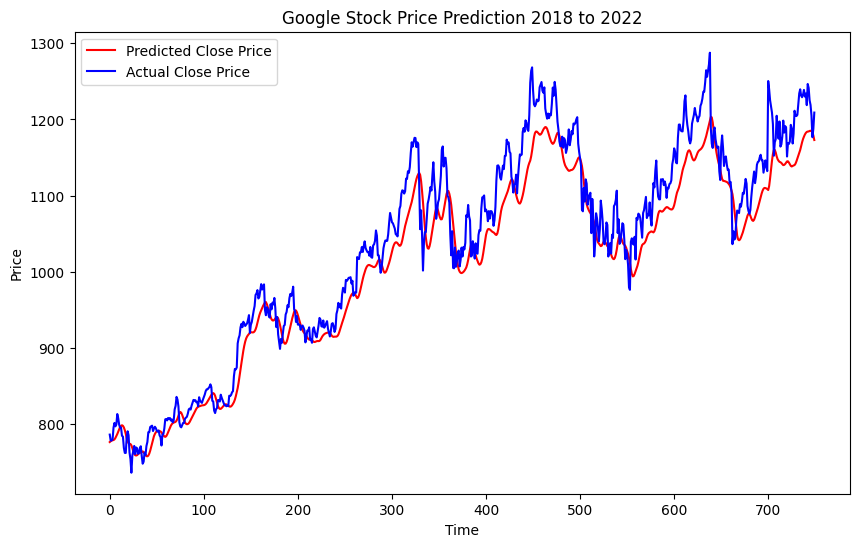

In [36]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(predictions[:,4], label='Predicted Close Price', color='r')
plt.plot(y_test_inverse[:,4], label='Actual Close Price', color='b')
plt.title('Google Stock Price Prediction 2018 to 2022')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming predictions and y_test_inverse contain the predicted and actual stock prices, respectively

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inverse[:,4],predictions[:,4])

print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 31.664016525286463
